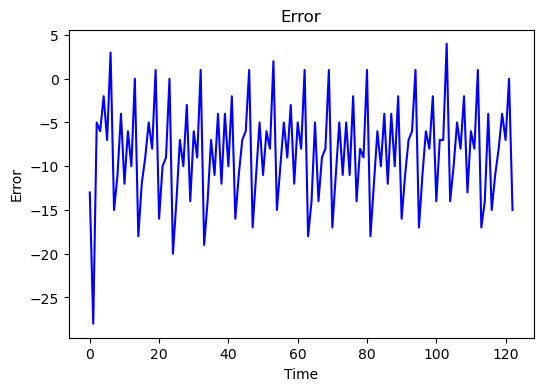

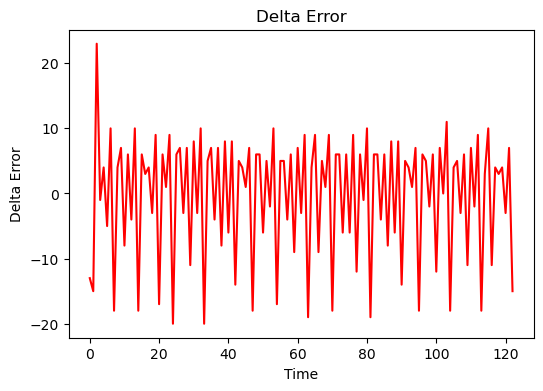

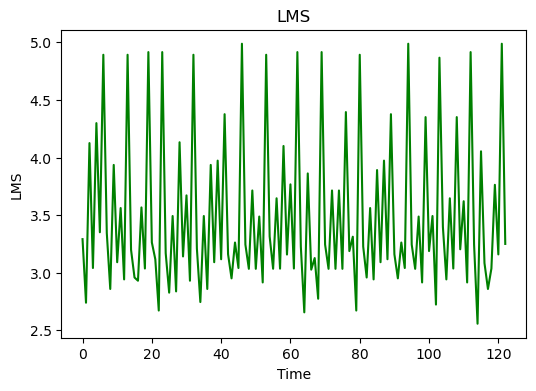

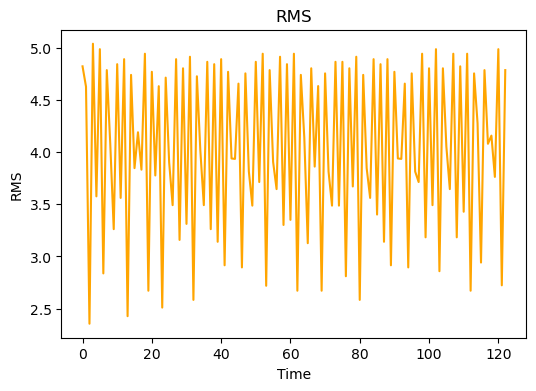

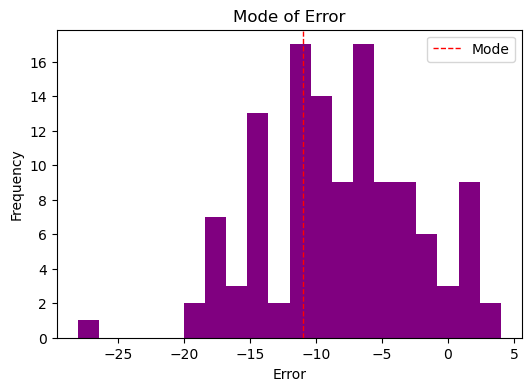

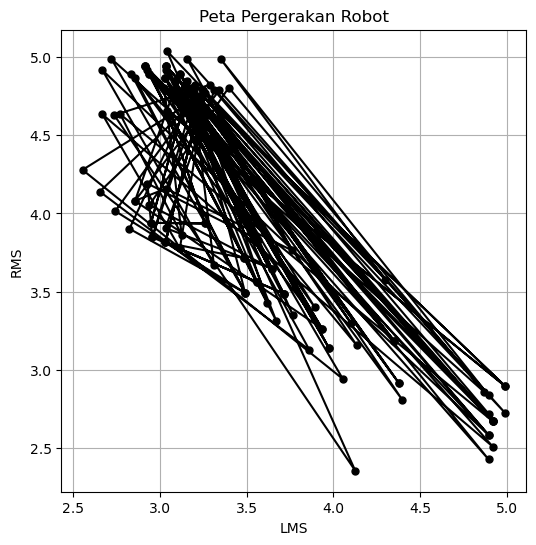

In [10]:
import csv
import matplotlib.pyplot as plt
from statistics import mode

# Membaca data dari file CSV
errors = []
delta_errors = []
lms_values = []
rms_values = []

with open('robot_readings.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        errors.append(float(row[0]))
        delta_errors.append(float(row[1]))
        lms_values.append(float(row[2]))
        rms_values.append(float(row[3]))

# Plot Error
plt.figure(figsize=(6, 4))
plt.plot(errors, color='blue')
plt.title('Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

# Plot Delta Error
plt.figure(figsize=(6, 4))
plt.plot(delta_errors, color='red')
plt.title('Delta Error')
plt.xlabel('Time')
plt.ylabel('Delta Error')
plt.show()

# Plot LMS
plt.figure(figsize=(6, 4))
plt.plot(lms_values, color='green')
plt.title('LMS')
plt.xlabel('Time')
plt.ylabel('LMS')
plt.show()

# Plot RMS
plt.figure(figsize=(6, 4))
plt.plot(rms_values, color='orange')
plt.title('RMS')
plt.xlabel('Time')
plt.ylabel('RMS')
plt.show()

# Plot Mode of Error
plt.figure(figsize=(6, 4))
plt.hist(errors, color='purple', bins=20)
plt.title('Mode of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(x=mode(errors), color='red', linestyle='dashed', linewidth=1)
plt.legend(['Mode'])
plt.show()

# Plot Peta Pergerakan Robot
plt.figure(figsize=(6, 6))
plt.plot(lms_values, rms_values, color='black', marker='o', linestyle='-', markersize=5)
plt.title('Peta Pergerakan Robot')
plt.xlabel('LMS')
plt.ylabel('RMS')
plt.grid(True)
plt.show()